In [1]:
import os
import numpy as np
import pandas as pd
import mplhep as hep
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

os.chdir('..')

from parameters import PtBinning, AK8TaggerWP

hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [2]:
folders = {
    '2016-PreVFP'  : '2016ULPre-VFP_FIXED_fixbkg',
    '2016-PostVFP' : '2016ULPost-VFP_FIXED_fixbkg',
    '2017'         : '2017UL_FIXED_fixbkg',
    '2018'         : '2018UL_FIXED_fixbkg'
}

filename = "/work/mmarcheg/BTVNanoCommissioning/fitdir/2016ULPre-VFP/msd100tau06btagDDCvLV2Hwp/fitResultsHwp.csv"
df = pd.read_csv(filename, usecols=['year', 'campaign', 'selection', 'wp', 'pt', 'c_cc', 'c_ccErrUp', 'c_ccErrDown'])
df = df[df['pt'] != 'Inclusive']
df

,year,campaign,selection,wp,pt,c_cc,c_ccErrUp,c_ccErrDown
1,2016,UL,msd100tau06,H,L,1.076111,0.923889,1.076111
2,2016,UL,msd100tau06,H,M,1.038275,0.107033,0.106758
3,2016,UL,msd100tau06,H,H,0.985663,0.165914,0.157367


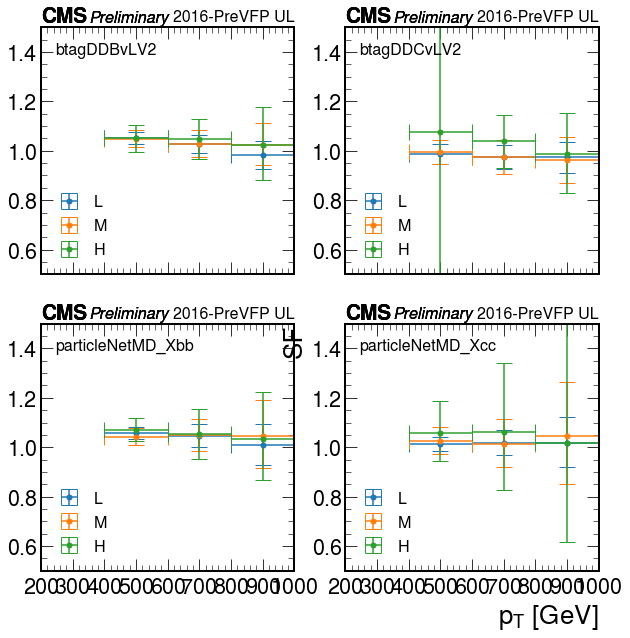

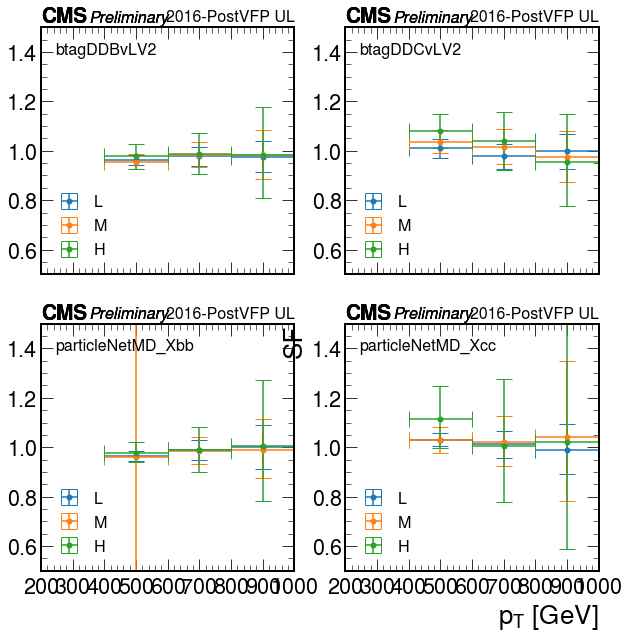

2017UL btagDDBvLV2 H WP: 1 datapoints are missing. Available pt:['L' 'H']
2017UL btagDDCvLV2 L WP: 2 datapoints are missing. Available pt:['H']
2017UL particleNetMD_Xcc L WP: 1 datapoints are missing. Available pt:['L' 'H']
2017UL particleNetMD_Xcc M WP: 1 datapoints are missing. Available pt:['M' 'H']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2017UL particleNetMD_Xcc H WP: -2 datapoints are missing. Available pt:['L' 'H' 'L' 'M' 'H']


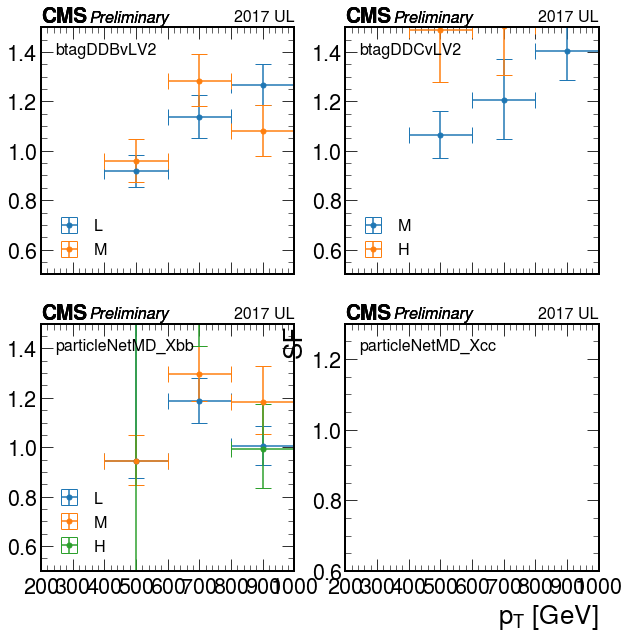

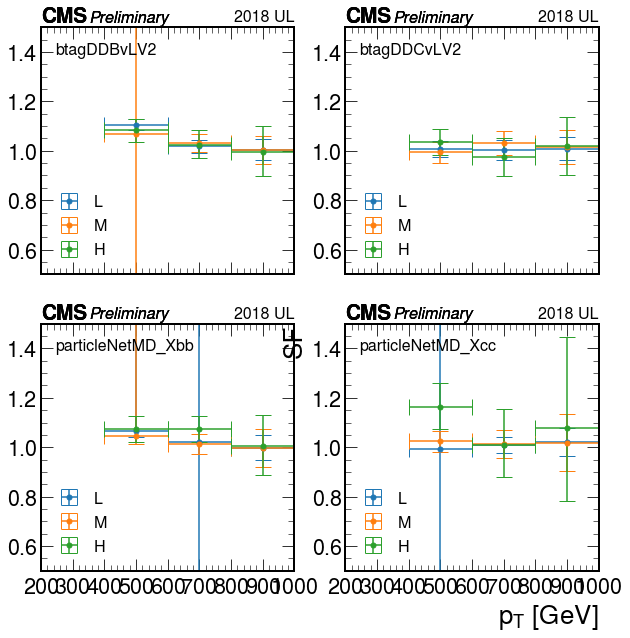

In [12]:
fontsize = 16

for key in folders.keys():
    folder = folders[key]
    year = key.split('-')[0]
    fig, axes = plt.subplots(2,2, sharex=True)
    plt.xlim(200, 1000)
    plt.ylim(0.6, 1.3)
    plt.xticks(np.arange(200, 1100, 100))
    plt.xlabel(r"p$_T$ [GeV]")
    plt.ylabel("SF")
    for i, tagger in enumerate(AK8TaggerWP['UL'][year].keys()):
        text = tagger
        at = AnchoredText(text, loc='upper left', prop={'fontsize' : fontsize}, frameon=False)
        axes[int(i/2)][i%2].add_artist(at)
        for wp in [ 'L', 'M', 'H' ]:
            
            SF = None
            SFerr = None

            if ('DDC' in tagger) | ('Xcc' in tagger):
                POI = 'c_cc'
            elif ('DDB' in tagger) | ('Xbb' in tagger):
                POI = 'b_bb'

            filename = f"/work/mmarcheg/BTVNanoCommissioning/fitdir/{folder}/msd100tau06{tagger}{wp}wp/fitResults{wp}wp.csv"
            #df = pd.read_csv(filename)
            #print(df)
            df = pd.read_csv(filename, usecols=['year', 'campaign', 'selection', 'wp', 'pt', f'{POI}', f'{POI}ErrUp', f'{POI}ErrDown'])
            #try: df = pd.read_csv(filename, usecols=['year', 'campaign', 'selection', 'wp', 'pt', f'{POI}', f'{POI}ErrUp', f'{POI}ErrDown'])
            #except: print(filename)
            df = df[df['pt'] != 'Inclusive']

            year = str(df['year'].values[0])
            campaign = df['campaign'].values[0]
            axes[int(i/2),i%2].set_title(f'{key} {campaign}', loc='right', fontsize=fontsize)
            hep.cms.text("Preliminary", ax=axes[int(i/2),i%2], loc=0, fontsize=fontsize)
            ptbinning = PtBinning[campaign][year]

            SF = df[POI].values
            SFerr = np.array( (df[f'{POI}ErrDown'].values, df[f'{POI}ErrUp'].values) )

            pt = []
            pterr = []
            for wpt in ptbinning.keys():
                if wpt == 'M+H': continue
                pt_low, pt_high = ptbinning[wpt]
                if 'H' in wpt:
                    pt_center = 900
                else:
                    pt_center = np.mean((pt_low, pt_high))
                pt_err = pt_center - pt_low
                pt.append(pt_center)
                pterr.append(pt_err)
                
            if len(SF) != len(pt):
                print(f"{year}{campaign} {tagger} {wp} WP: {len(pt) - len(SF)} datapoints are missing. Available pt:", end='')
                print(df['pt'].values)
                continue
            
            axes[int(i/2),i%2].errorbar(pt, SF, xerr=pterr, yerr=SFerr, capsize=8, linestyle='', marker='o', markersize=5, label=wp)
            axes[int(i/2),i%2].set_ylim(0.5, 1.5)
        axes[int(i/2),i%2].legend(loc="lower left", fontsize=fontsize)
        #plt.show()
        #axes[i/2,i%2].close()
    plt.show()
    plt.close()

In [ ]:
hep.cms.text?